In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Directory paths
train_dir = "/kaggle/input/cropped-lisa-traffic-light-dataset/cropped_lisa_1/train_1"
test_dir = "/kaggle/input/cropped-lisa-traffic-light-dataset/cropped_lisa_1/val_1"

# ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

# Validation data generator
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

# Define the CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # Assuming 7 categories for classification

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Train the model with the callback
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=7,
        validation_data=validation_generator,
    )
except Exception as e:
    print("Error during model training:", e)


Found 32797 images belonging to 7 classes.
Found 3737 images belonging to 7 classes.
Epoch 1/7
  3/513 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.2569 - loss: 2.8303   

W0000 00:00:1722412450.249670     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8009 - loss: 0.6760

W0000 00:00:1722412505.579960     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


513/513 ━━━━━━━━━━━━━━━━━━━━ 73s 116ms/step - accuracy: 0.8010 - loss: 0.6756 - val_accuracy: 0.6770 - val_loss: 0.9993
Epoch 2/7


W0000 00:00:1722412509.531184     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6770 - val_loss: 0.9993
Epoch 3/7
513/513 ━━━━━━━━━━━━━━━━━━━━ 47s 90ms/step - accuracy: 0.9090 - loss: 0.2710 - val_accuracy: 0.8799 - val_loss: 0.3658
Epoch 4/7
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8799 - val_loss: 0.3658
Epoch 5/7
513/513 ━━━━━━━━━━━━━━━━━━━━ 46s 89ms/step - accuracy: 0.9308 - loss: 0.2063 - val_accuracy: 0.9125 - val_loss: 0.3613
Epoch 6/7
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9125 - val_loss: 0.3613
Epoch 7/7
513/513 ━━━━━━━━━━━━━━━━━━━━ 46s 89ms/step - accuracy: 0.9462 - loss: 0.1552 - val_accuracy: 0.8491 - val_loss: 0.6963


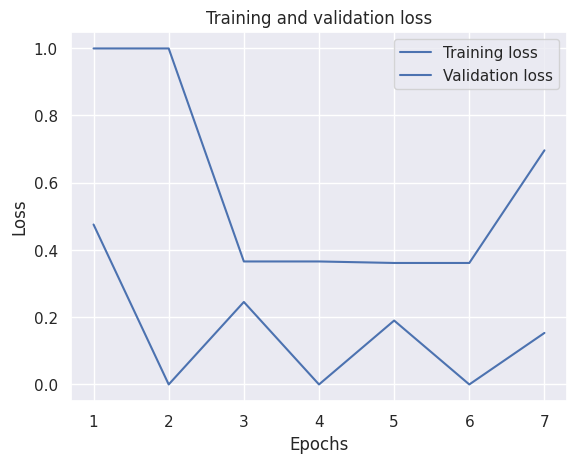

In [19]:
import matplotlib.pyplot as plt
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("model_emotion.h5")

### Training and validation accuracy curves

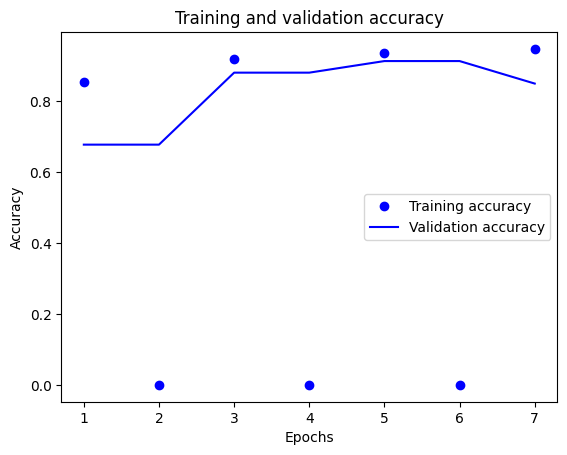

In [16]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix

59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


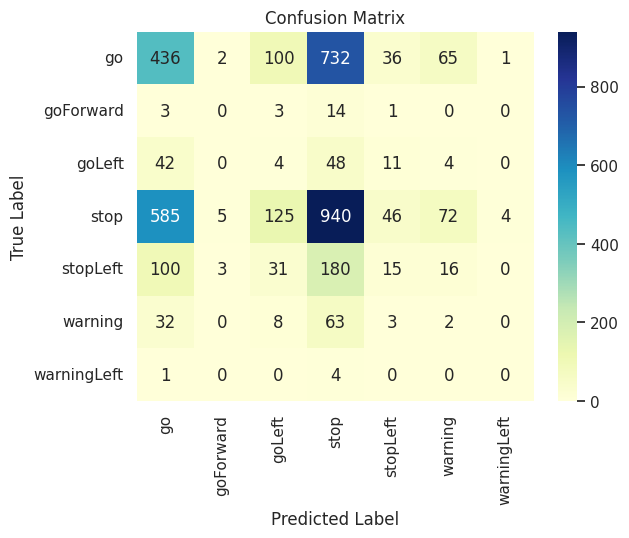

In [18]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import numpy as np
# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()